In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-12-20 07:14:28--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  41.8MB/s    in 4.0s    

2022-12-20 07:14:33 (35.4 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2022-12-20 07:14:33--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

In [2]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [3]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse40-9.png', 'horse14-8.png', 'horse12-0.png', 'horse45-4.png', 'horse11-6.png', 'horse29-0.png', 'horse06-9.png', 'horse37-8.png', 'horse28-8.png', 'horse28-0.png']
TRAIN SET HUMANS: ['human11-17.png', 'human09-06.png', 'human17-08.png', 'human01-20.png', 'human06-28.png', 'human05-21.png', 'human13-06.png', 'human11-16.png', 'human11-18.png', 'human02-14.png']
VAL SET HORSES: ['horse5-164.png', 'horse5-303.png', 'horse2-368.png', 'horse4-302.png', 'horse5-032.png', 'horse4-468.png', 'horse4-599.png', 'horse5-519.png', 'horse3-584.png', 'horse1-436.png']
VAL SET HUMANS: ['valhuman01-02.png', 'valhuman03-01.png', 'valhuman05-16.png', 'valhuman01-07.png', 'valhuman02-02.png', 'valhuman03-23.png', 'valhuman04-18.png', 'valhuman03-22.png', 'valhuman05-03.png', 'valhuman03-16.png']


In [5]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  
        target_size=(150, 150),  
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',
        target_size=(150, 150),  
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 17s 748ms/step - loss: 1.6164 - accuracy: 0.4828 - val_loss: 0.6268 - val_accuracy: 0.5664
Epoch 2/15
8/8 [==============================] - 11s 2s/step - loss: 0.5573 - accuracy: 0.6997 - val_loss: 0.7330 - val_accuracy: 0.7617
Epoch 3/15
8/8 [==============================] - 8s 984ms/step - loss: 0.4359 - accuracy: 0.8320 - val_loss: 0.8504 - val_accuracy: 0.7969
Epoch 4/15
8/8 [==============================] - 8s 959ms/step - loss: 0.2103 - accuracy: 0.9177 - val_loss: 0.8919 - val_accuracy: 0.8281
Epoch 5/15
8/8 [==============================] - 7s 912ms/step - loss: 0.2016 - accuracy: 0.9255 - val_loss: 0.8589 - val_accuracy: 0.8789
Epoch 6/15
8/8 [==============================] - 7s 881ms/step - loss: 0.0840 - accuracy: 0.9633 - val_loss: 1.1495 - val_accuracy: 0.8242
Epoch 7/15
8/8 [==============================] - 7s 829ms/step - loss: 0.0870 - accuracy: 0.9648 - val_loss: 6.2221 - val_accuracy: 0.5312
Epoch 8/15
8/8 [=====

In [11]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-g639ac0ea1_640.jpg to horse-g639ac0ea1_640.jpg
1/1 [==============================] - 0s 169ms/step
[0.9894505]
horse-g639ac0ea1_640.jpg is a human


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-950c59d1d775>:33: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


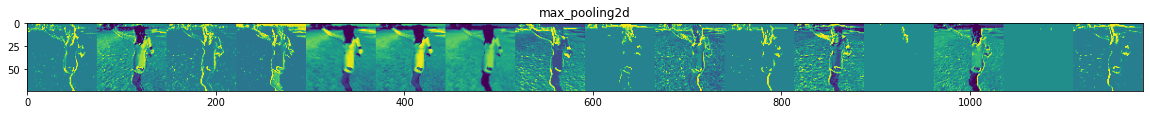

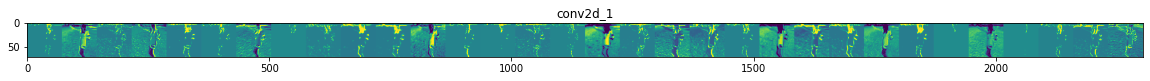

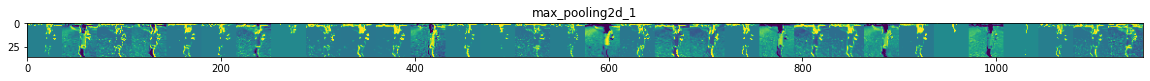

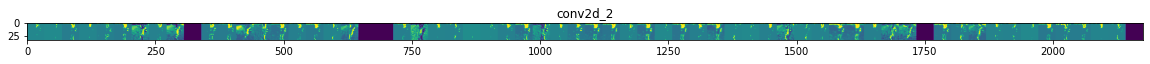

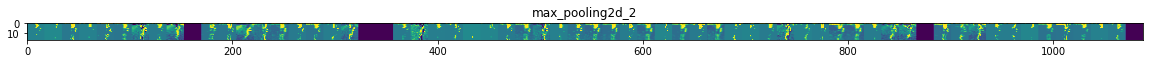

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')